# Tensors(张量)

Tensors 类似于 NumPy 的 ndarrays ，同时  Tensors 可以使用 GPU 进行计算。

In [1]:
from __future__ import print_function
import torch
#构造一个5x3矩阵，不初始化。
x = torch.empty(5, 3)
print(x)

tensor([[3.9480e-14, 5.6052e-43, 3.9480e-14],
        [5.6052e-43, 3.9473e-14, 5.6052e-43],
        [3.9473e-14, 5.6052e-43, 3.9483e-14],
        [5.6052e-43, 3.9483e-14, 5.6052e-43],
        [3.9470e-14, 5.6052e-43, 3.9470e-14]])


构造一个随机初始化的矩阵：

In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7054, 0.8372, 0.3413],
        [0.8652, 0.4876, 0.8108],
        [0.7333, 0.6656, 0.1792],
        [0.9095, 0.7659, 0.7714],
        [0.5315, 0.8921, 0.8297]])


构造一个矩阵全为 0，而且数据类型是 long.

In [3]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


构造一个张量，直接使用数据：

In [ ]:
x = torch.tensor([5.5, 3])
print(x)

In [ ]:
创建一个 tensor 基于已经存在的 tensor。

In [4]:
x = x.new_ones(5, 3, dtype=torch.double)      
# new_* methods take in sizes
print(x)
x = torch.randn_like(x, dtype=torch.float)

# override dtype!
print(x)

# result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.5601,  0.0768,  0.5723],
        [-0.3126,  0.7375,  1.3284],
        [ 1.5297, -0.3529, -0.5143],
        [-0.3154,  1.7831,  0.1601],
        [ 0.7591, -0.4533,  0.3662]])


In [5]:
# 获取它的维度信息:
print(x.size())

torch.Size([5, 3])


注意

torch.Size  是一个元组，所以它支持左右的元组操作。

# 操作

在接下来的例子中，我们将会看到加法操作。

加法: 方式 1

In [6]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.6402,  0.1149,  1.0992],
        [ 0.3165,  0.8981,  2.0929],
        [ 1.7807,  0.4385, -0.2640],
        [-0.0402,  2.2724,  0.6878],
        [ 1.1958,  0.0457,  0.5569]])


加法: 方式2

In [7]:
print(torch.add(x, y))

tensor([[ 1.6402,  0.1149,  1.0992],
        [ 0.3165,  0.8981,  2.0929],
        [ 1.7807,  0.4385, -0.2640],
        [-0.0402,  2.2724,  0.6878],
        [ 1.1958,  0.0457,  0.5569]])


加法: 提供一个输出 tensor 作为参数

In [8]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.6402,  0.1149,  1.0992],
        [ 0.3165,  0.8981,  2.0929],
        [ 1.7807,  0.4385, -0.2640],
        [-0.0402,  2.2724,  0.6878],
        [ 1.1958,  0.0457,  0.5569]])


加法: in-place

Note

注意
任何使张量会发生变化的操作都有一个前缀 ''。例如：x.copy(y), x.t_(), 将会改变 x.

你可以使用标准的  NumPy 类似的索引操作

In [10]:
print(result[:, 1])

tensor([0.1149, 0.8981, 0.4385, 2.2724, 0.0457])


改变大小：如果你想改变一个 tensor 的大小或者形状，你可以使用 torch.view:

In [11]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


如果你有一个元素 tensor ，使用 .item() 来获得这个 value 。

In [12]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.8273])
0.8272877931594849


# 自动微分

autograd 包是 PyTorch 中所有神经网络的核心。首先让我们简要地介绍它，然后我们将会去训练我们的第一个神经网络。该 autograd 软件包为 Tensors 上的所有操作提供自动微分。它是一个由运行定义的框架，这意味着以代码运行方式定义你的后向传播，并且每次迭代都可以不同。我们从 tensor 和 gradients 来举一些例子。

1、TENSOR

torch.Tensor 是包的核心类。如果将其属性 .requires_grad 设置为 True，则会开始跟踪针对 tensor 的所有操作。完成计算后，您可以调用 .backward() 来自动计算所有梯度。该张量的梯度将累积到 .grad 属性中。

要停止 tensor 历史记录的跟踪，您可以调用 .detach()，它将其与计算历史记录分离，并防止将来的计算被跟踪。

要停止跟踪历史记录（和使用内存），您还可以将代码块使用 with torch.no_grad(): 包装起来。在评估模型时，这是特别有用，因为模型在训练阶段具有 requires_grad = True 的可训练参数有利于调参，但在评估阶段我们不需要梯度。

还有一个类对于 autograd 实现非常重要那就是 Function。Tensor 和 Function 互相连接并构建一个非循环图，它保存整个完整的计算过程的历史信息。每个张量都有一个 .grad_fn 属性保存着创建了张量的 Function 的引用，（如果用户自己创建张量，则g rad_fn 是 None ）。

如果你想计算导数，你可以调用 Tensor.backward()。如果 Tensor 是标量（即它包含一个元素数据），则不需要指定任何参数backward()，但是如果它有更多元素，则需要指定一个gradient 参数来指定张量的形状。

In [2]:
import torch

创建一个张量，设置 requires_grad=True 来跟踪与它相关的计算



In [3]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


针对张量做一个操作

In [4]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


针对 y 做更多的操作：

In [5]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_( ... ) 会改变张量的 requires_grad 标记。输入的标记默认为  False ，如果没有提供相应的参数。

In [6]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


梯度：

我们现在后向传播，因为输出包含了一个标量，out.backward() 等同于out.backward(torch.tensor(1.))。

In [7]:
out.backward()

打印梯度  d(out)/dx

In [8]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


原理解释：
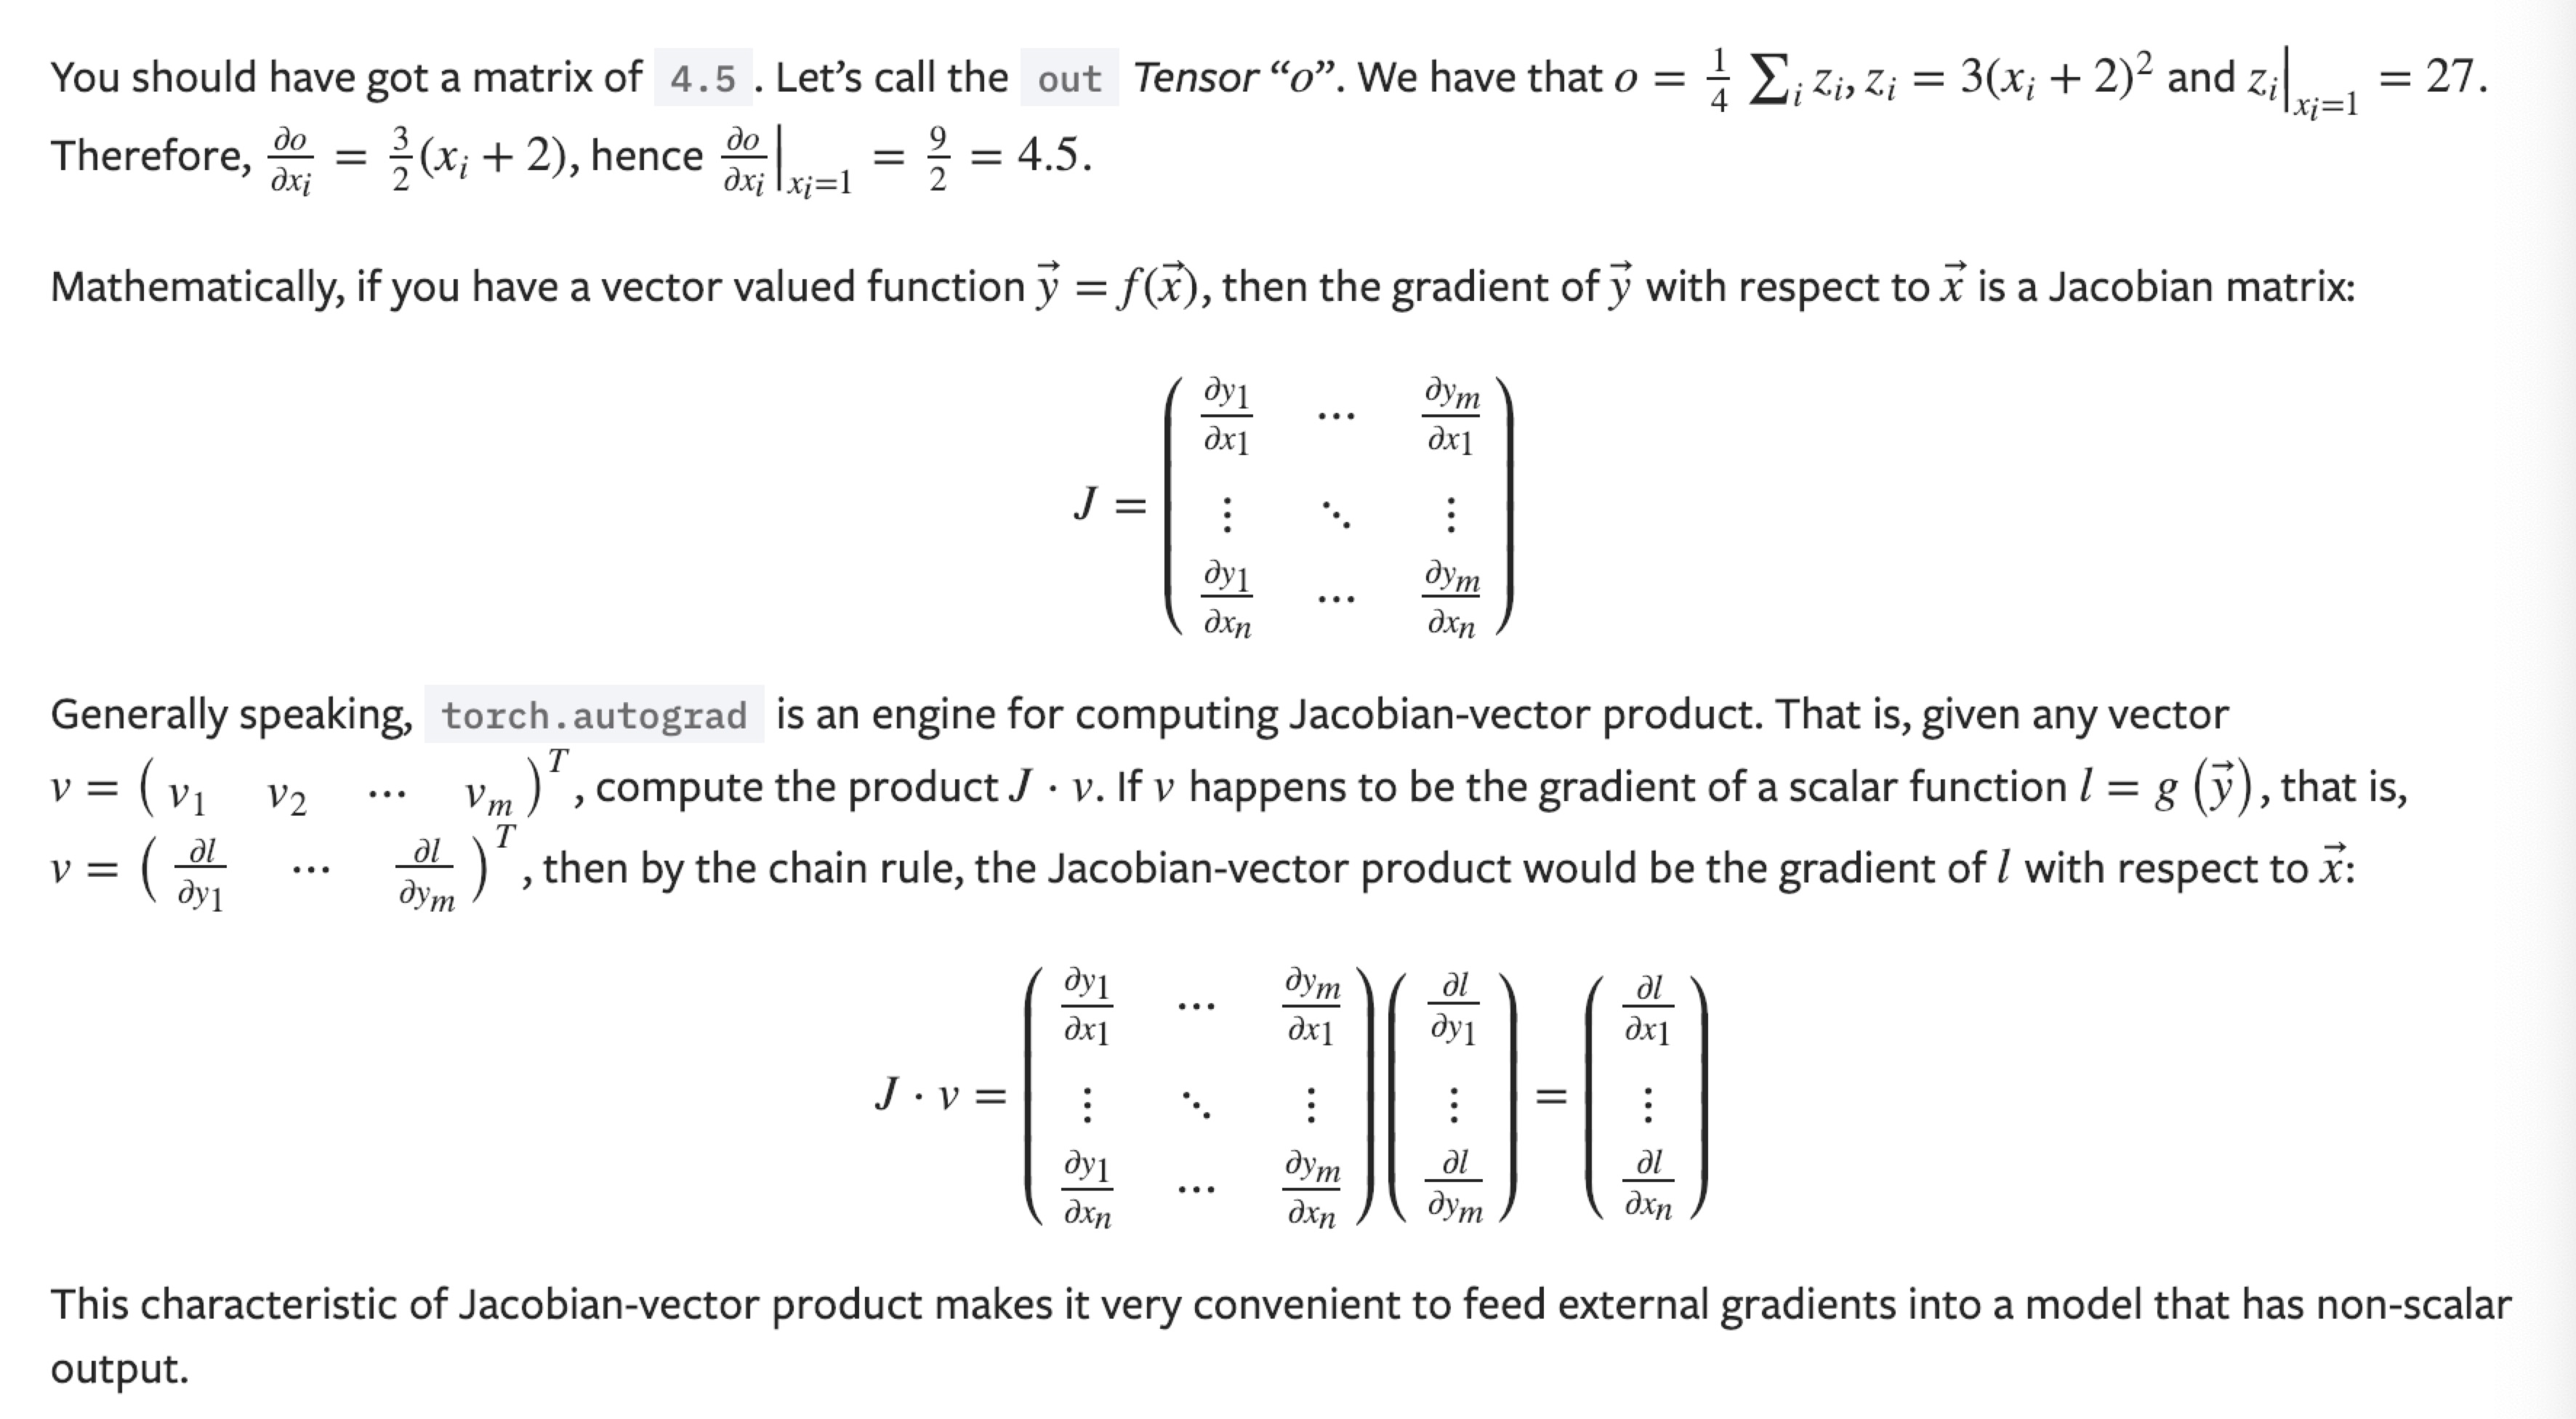

现在让我们看一个雅可比向量积的例子：

In [9]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([507.7537, 911.8552, 367.8465], grad_fn=<MulBackward0>)


现在在这种情况下，y 不再是一个标量。torch.autograd 不能够直接计算整个雅可比，但是如果我们只想要雅可比向量积，只需要简单的传递向量给 backward 作为参数。

In [10]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


你可以通过将代码包裹在 with torch.no_grad()，来停止对从跟踪历史中 的 .requires_grad=True 的张量自动求导

In [11]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


神经网络

神经网络可以通过 torch.nn 包来构建。

现在对于自动梯度(autograd)有一些了解，神经网络是基于自动梯度 (autograd)来定义一些模型。一个 nn.Module 包括层和一个方法 forward(input) 它会返回输出(output)。

例如，看一下数字图片识别的网络：
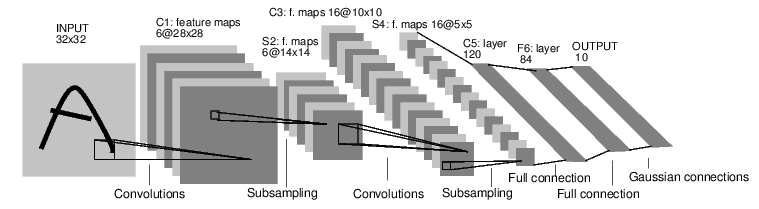

这是一个简单的前馈神经网络，它接收输入，让输入一个接着一个的通过一些层，最后给出输出。

一个典型的神经网络训练过程包括以下几点：

1.定义一个包含可训练参数的神经网络

2.迭代整个输入

3.通过神经网络处理输入

4.计算损失(loss)

5.反向传播梯度到神经网络的参数

6.更新网络的参数，典型的用一个简单的更新方法：weight = weight - learning_rate *gradient

定义神经网络

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


你刚定义了一个前馈函数，然后反向传播函数被自动通过 autograd 定义了。你可以使用任何张量操作在前馈函数上。

一个模型可训练的参数可以通过调用 net.parameters() 返回：

In [14]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


让我们尝试随机生成一个 32x32 的输入。注意：期望的输入维度是 32x32 。为了使用这个网络在 MNIST 数据及上，你需要把数据集中的图片维度修改为 32x32。

In [15]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0858, -0.0760, -0.0076, -0.0951, -0.0681, -0.0206,  0.0748,  0.0057,
          0.0231, -0.1210]], grad_fn=<AddmmBackward0>)


把所有参数梯度缓存器置零，用随机的梯度来反向传播

In [16]:
net.zero_grad()
out.backward(torch.randn(1, 10))

在继续之前，让我们复习一下所有见过的类。

torch.Tensor - A multi-dimensional array with support for autograd operations like backward(). Also holds the gradient w.r.t. the tensor. nn.Module - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc. nn.Parameter - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module. autograd.Function - Implements forward and backward definitions of an autograd operation. Every Tensor operation, creates at least a single Function node, that connects to functions that created a Tensor and encodes its history.

在此，我们完成了：

1.定义一个神经网络

2.处理输入以及调用反向传播

还剩下：

1.计算损失值

2.更新网络中的权重

损失函数

一个损失函数需要一对输入：模型输出和目标，然后计算一个值来评估输出距离目标有多远。

有一些不同的损失函数在 nn 包中。一个简单的损失函数就是 nn.MSELoss ，这计算了均方误差。

例如：

In [17]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9677, grad_fn=<MseLossBackward0>)


现在，如果你跟随损失到反向传播路径，可以使用它的 .grad_fn 属性，你将会看到一个这样的计算图：

所以，当我们调用 loss.backward()，整个图都会微分，而且所有的在图中的requires_grad=True 的张量将会让他们的 grad 张量累计梯度。

为了演示，我们将跟随以下步骤来反向传播。

In [19]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

反向传播

为了实现反向传播损失，我们所有需要做的事情仅仅是使用 loss.backward()。你需要清空现存的梯度，要不然帝都将会和现存的梯度累计到一起。

现在我们调用 loss.backward() ，然后看一下 con1 的偏置项在反向传播之前和之后的变化。

In [20]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-1.7441e-04,  8.4844e-04,  1.7319e-02,  4.1320e-05,  4.0315e-03,
        -1.0731e-05])


现在我们看到了，如何使用损失函数。

唯一剩下的事情就是更新神经网络的参数。

更新神经网络参数：

最简单的更新规则就是随机梯度下降。

我们可以使用 python 来实现这个规则：

In [22]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

尽管如此，如果你是用神经网络，你想使用不同的更新规则，类似于 SGD, Nesterov-SGD, Adam, RMSProp, 等。为了让这可行，我们建立了一个小包：torch.optim 实现了所有的方法。使用它非常的简单。

In [24]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update